# Análise dos dados do Corona Vírus (SARS-CoV-2 / COVID-19)

Em fevereiro de 2020, a Johns Hopkins University liberou um dashboard com dados a respeito do coronavirus (na época ainda sem o nome da doença devidamente definido) https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

## Importando as bibliotecas

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [19, 9]

## Carregando os dados

In [2]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
request_confirmed = requests.get(url_confirmed).content
df_confirmed = pd.read_csv(io.StringIO(request_confirmed.decode('utf-8')))

## Olhando os dados crus

Os dados que vem do arquivo (um `.csv`), são os seguintes:

In [3]:
df_confirmed.transpose()

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,459
Province/State,NaN,NaN,NaN,NaN,NaN,British Columbia,New South Wales,Victoria,Queensland,NaN,...,NaN,NaN,NaN,NaN,Virgin Islands,Cayman Islands,Reunion,NaN,NaN,NaN
Country/Region,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,Cambodia,...,Republic of the Congo,Somalia,Tanzania,The Bahamas,US,United Kingdom,France,Barbados,Montenegro,The Gambia
Lat,15,36,1.2833,28.1667,2.5,49.2827,-33.8688,-37.8136,-28.0167,11.55,...,-1.44,5.1521,-6.369,24.25,18.3358,19.3133,-21.1351,13.1939,42.5,13.4667
Long,101,138,103.833,84.25,112.5,-123.121,151.209,144.963,153.4,104.917,...,15.556,46.1996,34.8888,-76,-64.8963,-81.2546,55.2471,-59.5432,19.3,-16.6
1/22/20,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,5,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,7,2,3,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,8,4,4,1,4,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1/27/20,8,4,5,1,4,0,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Analisando os dados

Olhando para os dados que temos, plotando a latitude e a longitude (variáveis `Lat` e `Long`), temos o seguinte:

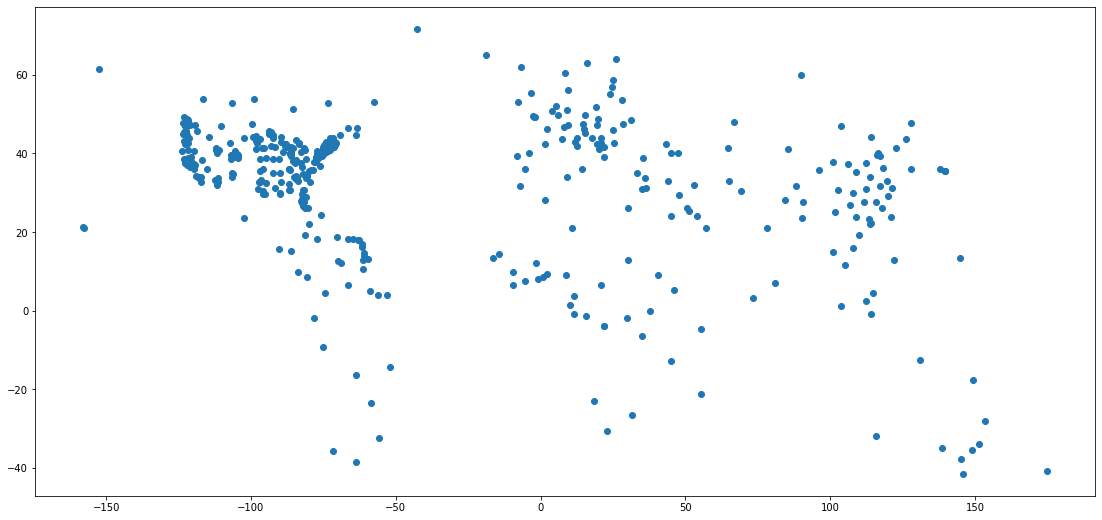

In [4]:
plt.scatter(df_confirmed.Long, df_confirmed.Lat)

## Olhando para os dados

### A escala logarítmica

Olhando para os dados, percebemos que existem diferenças em ordem de grandezas que fazem com que a variação não possa ser percebida tão claramente. Observe, por exemplo, os valores absolutos de casos confirmados na **Itália** e no **Brasil** (cada linha horizontal, neste caso, equivale a $5.000$ casos):

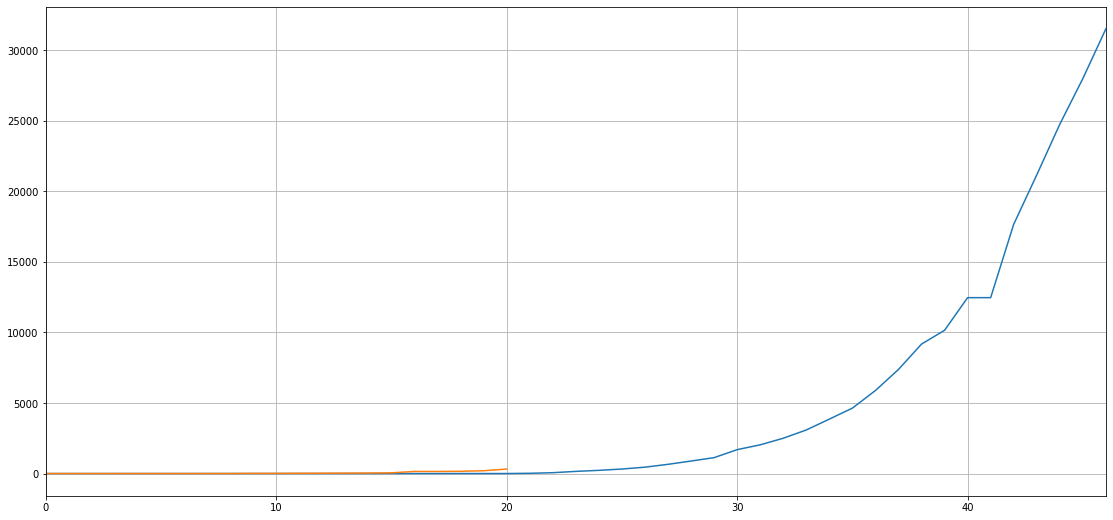

In [5]:
ax = (df_confirmed[df_confirmed['Country/Region'] == 'Italy'].transpose()[13:].astype(float)).reset_index()[16].plot()
(df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index()[35].plot(ax=ax, grid=True)

Agora, mostramos os mesmos dados, só que em escala logarítmica. Perceba que as diferenças dos números ficam mais claras. Neste caso, cada linha horizontal equivale a $10^{número\_da\_linha}$

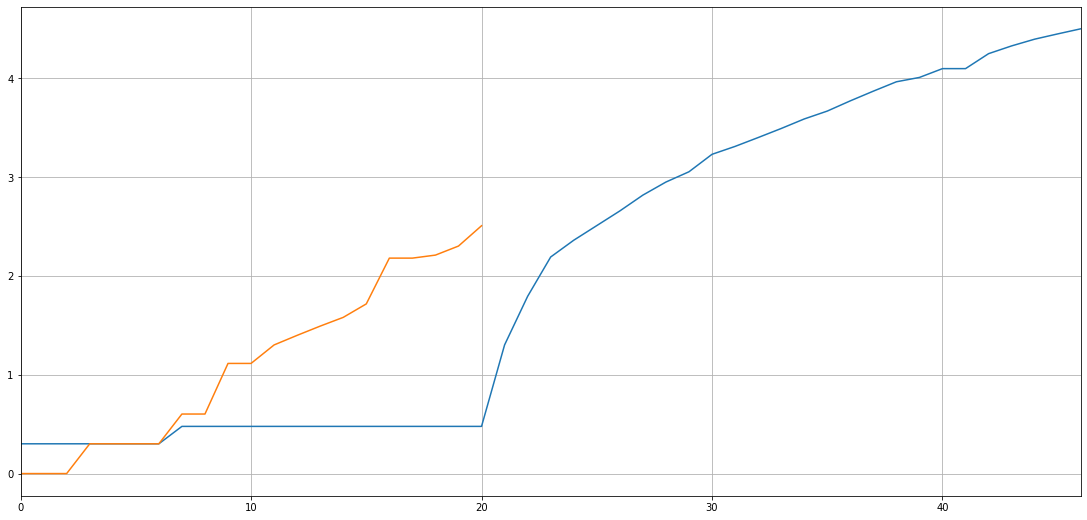

In [6]:
ax = np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Italy'].transpose()[13:].astype(float)).reset_index()[16].plot()
np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index()[35].plot(ax=ax, grid=True)

## Brasil e China

Os dados do conjunto não possuem os dados do dia $0$ da China, então utilizamos o que temos:

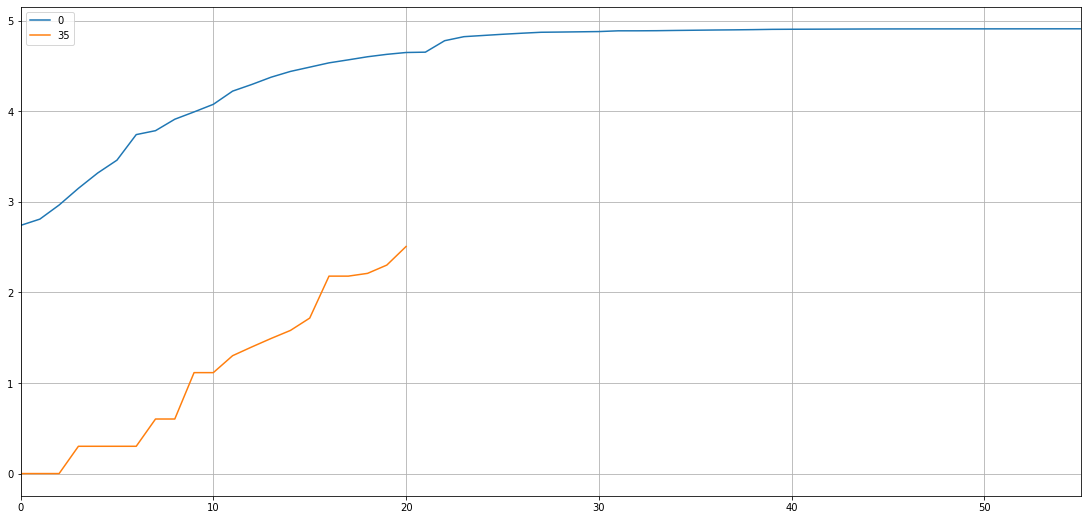

In [7]:
ax = np.log10(df_confirmed[df_confirmed['Country/Region'] == 'China'].sum().transpose()[4:].astype(float)).reset_index().plot()
np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index().plot(ax=ax, grid=True)

## Brasil e Espanha

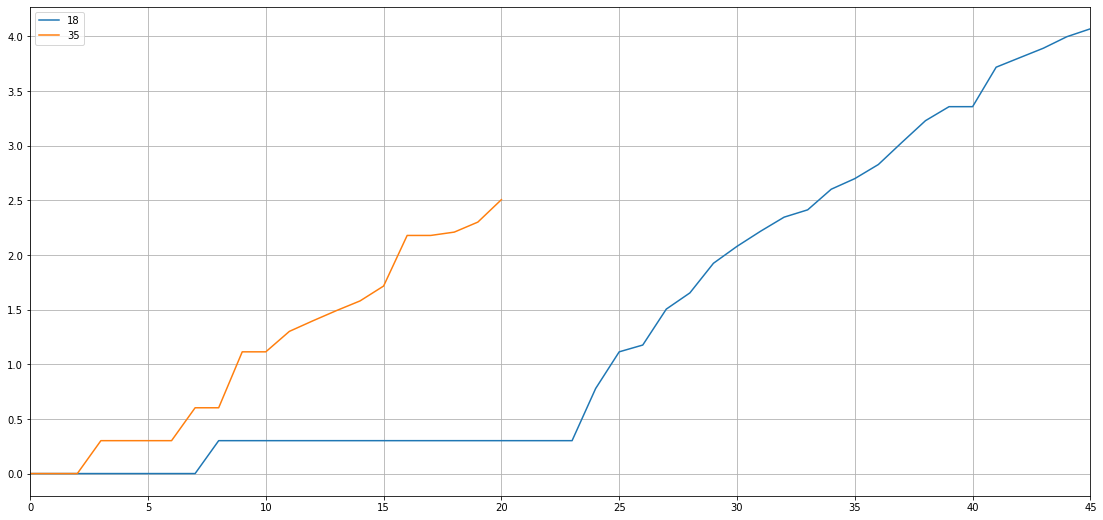

In [8]:
ax = np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Spain'].transpose()[14:].astype(float)).reset_index().plot()
np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index().plot(ax=ax, grid=True)

## Brasil e Itália

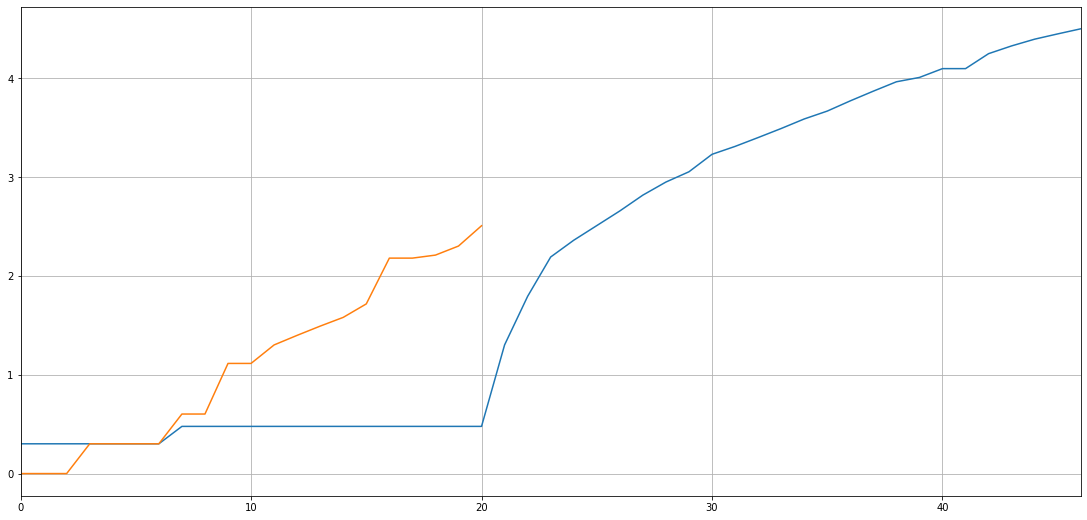

In [9]:
ax = np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Italy'].transpose()[13:].astype(float)).reset_index()[16].plot()
np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index()[35].plot(ax=ax, grid=True)